
## Problem Definifion

### Overview

In this competition, we are tasked with developing a machine learning model to classify mushrooms as either edible or poisonous based on their physical characteristics. The dataset provided is based on a deep learning model trained on the UCI Mushroom dataset, with feature distributions that are similar, but not identical, to the original dataset. Competitors are encouraged to explore the differences and consider incorporating the original UCI dataset to potentially improve model performance.

### Problem Statement

The objective is to accurately predict whether a given mushroom is edible or poisonous using its physical characteristics as features. This binary classification problem is crucial for ensuring safety in foraging and consumption of wild mushrooms. The challenge includes handling categorical features, some of which may not be found in the original dataset, adding complexity to the model development process.

### Suitable Metrics

1. **Recall:** This is crucial because the cost of misclassifying a poisonous mushroom as edible (False Negative) is high.
2. **Accuracy:** This measures the overall performance of the model in classifying instances correctly.

# Data Understanding

In [5]:
# Import libraries and data
from sklearn.linear_model import LogisticRegression
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample=pd.read_csv("sample_submission.csv")

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


### Dataset Description (Domain Knowledge)

**The dataset consists of several features related to the physical characteristics of mushrooms. These features will be used to predict whether a mushroom is edible or poisonous (the target variable). Below is a brief description of each feature:**

- `id`: A unique identifier for each mushroom sample.
- `class`: The target variable indicating whether the mushroom is edible (e) or poisonous (p).
- `cap-diameter`: Numerical feature representing the diameter of the mushroom cap.
- `cap-shape`: Categorical feature describing the shape of the mushroom cap.
- `cap-surface`: Categorical feature describing the surface texture of the mushroom cap.
- `cap-color`: Categorical feature describing the color of the mushroom cap.
- `does-bruise-or-bleed`: Categorical feature indicating whether the mushroom bruises or bleeds when handled.
- `gill-attachment`: Categorical feature describing how the gills are attached to the mushroom stem.
- `gill-spacing`: Categorical feature describing the spacing of the gills.
- `gill-color`: Categorical feature describing the color of the gills.
- `stem-height`: Numerical feature representing the height of the mushroom stem.
- `stem-width`: Numerical feature representing the width of the mushroom stem.
- `stem-root`: Categorical feature describing the root type of the stem.
- `stem-surface`: Categorical feature describing the surface texture of the stem.
- `stem-color`: Categorical feature describing the color of the stem.
- `veil-type`: Categorical feature describing the type of veil covering the mushroom.
- `veil-color`: Categorical feature describing the color of the veil.
- `has-ring`: Categorical feature indicating whether the mushroom has a ring on the stem.
- `ring-type`: Categorical feature describing the type of ring on the stem.
- `spore-print-color`: Categorical feature describing the color of the spore print.
- `habitat`: Categorical feature describing the type of environment where the mushroom is typically found.
- `season`: Categorical feature indicating the season during which the mushroom is found.


## Data Preprocessing

In [6]:
# define the columns need cleaning
columns_to_clean = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
    'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
    'ring-type', 'spore-print-color', 'habitat'
]
# Define valid categories for each column
valid_categories = {
    'cap-shape': ['f', 'x', 'p', 'b', 'o', 'c', 's'],
    'cap-surface': ['s', 'h', 'y', 'l'],
    'cap-color': [ 'b', 'g', 'u', 'o','w', 'e','n' 'y', 'r', 'p', 'k'],
    'does-bruise-or-bleed': ['f', 't'],
    'gill-attachment': ['a', 'x', 's', 'd'],
    'gill-spacing': ['c', 'd'],
    'gill-color': ['w', 'n', 'g', 'k'],
    'stem-root': ['b', 'c', 'r', 's', 'f'],
    'stem-surface': ['y', 's', 't', 'g'],
    'stem-color': ['w', 'o', 'n', 'y', 'e'],
    'veil-type': ['u', 'd'],
    'veil-color': ['n', 'w', 'k', 'y'],
    'has-ring': ['f', 't'],
    'ring-type': ['f', 'z', 'e', 'p'],
    'spore-print-color': ['k', 'w', 'p', 'n'],
    'habitat': ['d', 'l', 'g', 'h', 'p', 'm', 'u']
}


In [7]:
# Clean outliner and randomness
for column in columns_to_clean:
# categorical variable
    train[column] = train[column].apply(lambda x: x if x in valid_categories[column] else np.nan)
    test[column] = test[column].apply(lambda x: x if x in valid_categories[column] else np.nan)

In [8]:
# Split numeral and oject data type
ob = [col for col in train.columns if train[col].dtype == 'object']
num = [col for col in train.columns if col not in ob]

#remoce the output
ob.remove('class')
#remove the id
num.remove('id')

# Let see what columns of each
ob
num

['cap-diameter', 'stem-height', 'stem-width']

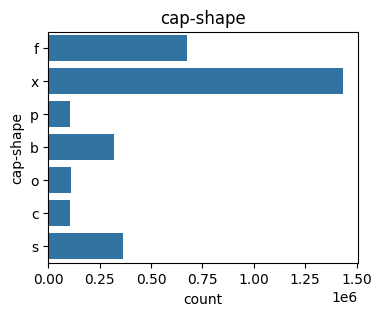

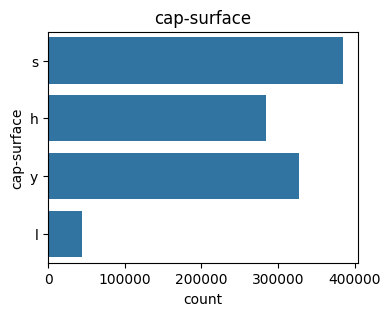

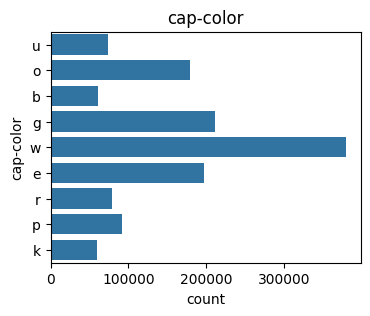

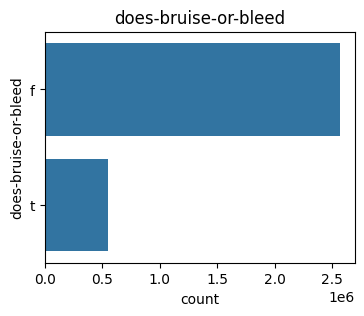

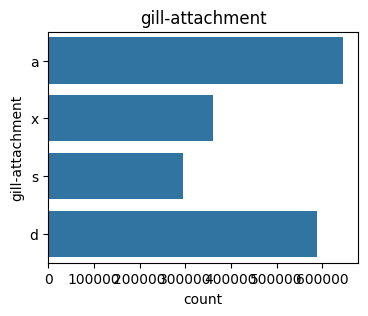

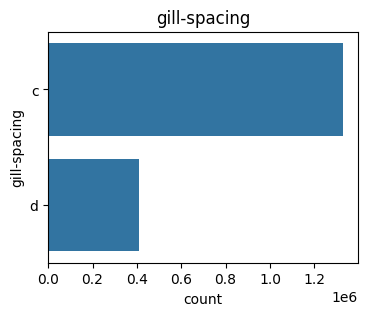

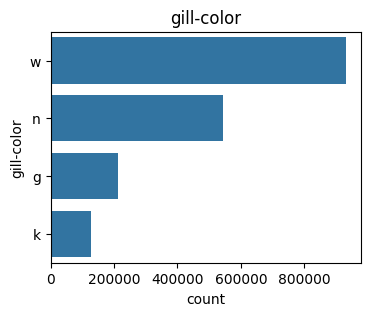

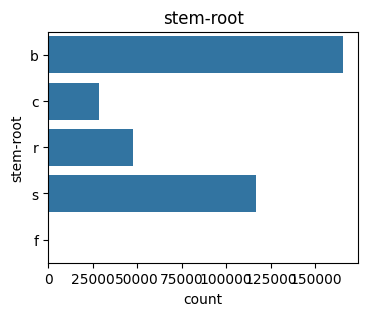

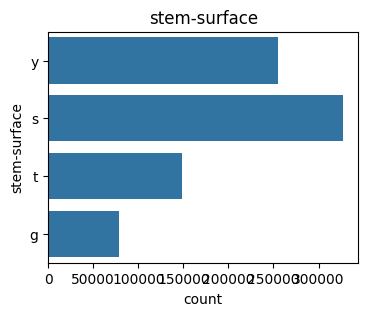

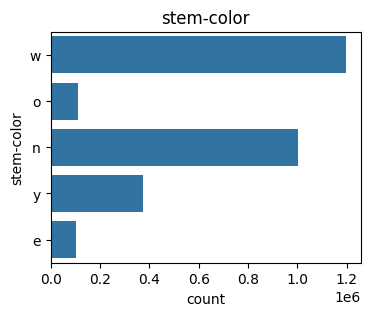

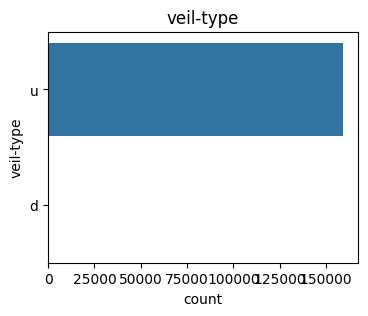

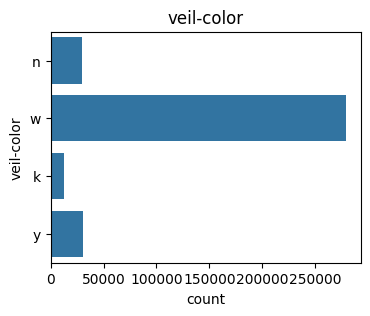

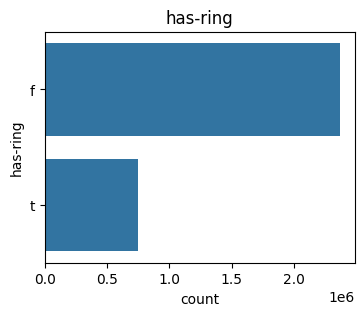

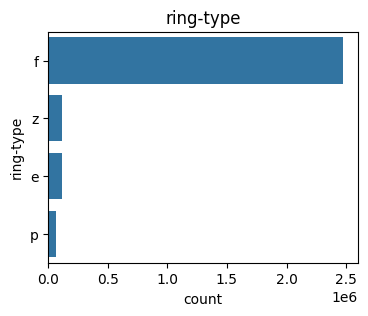

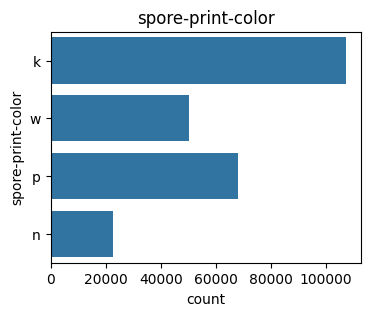

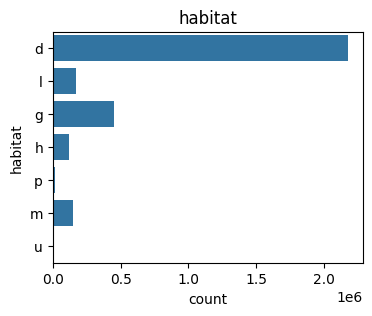

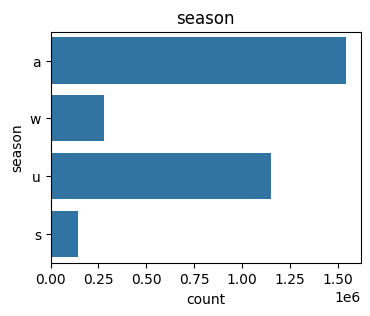

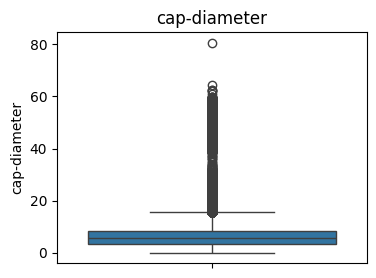

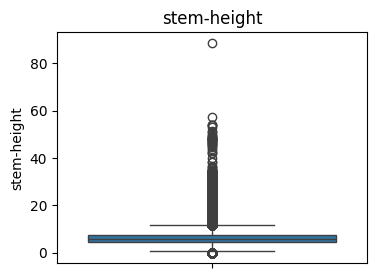

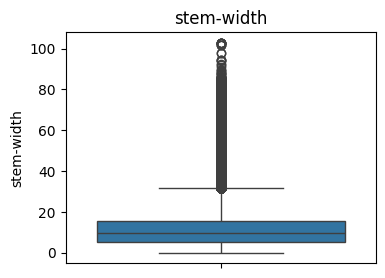

In [9]:
# cat
# plot count values of each categorical variable
for var in ob:
    plt.figure(figsize=(4,3))
    sns.countplot(data=train[var])
    plt.title(var)
    plt.show()

#numertal
# Check the range of numerical variables using boxplots
for var in num:
    plt.figure(figsize=(4,3))
    sns.boxplot(data=train[var])
    plt.title(var)
    plt.show()

### Handle Missing Values

There are some features that have high proportion of missing value

In [10]:
# check for missing of cat
na = train[ob].isna().mean()
# There are columns that have a high proportion of missing *italicized text*

In [11]:
# delete columns with high proportion of missing
redundant_ob=[i for i in na.index if na[i] > 0.5]
train_nona = train.drop(columns=redundant_ob)
test_nona = test.drop(columns=redundant_ob)
ob = [i for i in ob if i not in redundant_ob]
ob

train_nona.info()
test_nona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 15 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   does-bruise-or-bleed  object 
 5   gill-attachment       object 
 6   gill-spacing          object 
 7   gill-color            object 
 8   stem-height           float64
 9   stem-width            float64
 10  stem-color            object 
 11  has-ring              object 
 12  ring-type             object 
 13  habitat               object 
 14  season                object 
dtypes: float64(3), int64(1), object(11)
memory usage: 356.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2077964 entries, 0 to 2077963
Data columns (total 14 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   cap-

For other missing values

- **Nominal data:** Mode is used because it focuses on the most frequent category, which is the only meaningful aspect of nominal data.
- **Ordinal data:** Median is used because it accounts for the inherent order of the categories, providing a more informative measure of central tendency.

In [12]:
# imputing with mode
#loop thru each columns
for column in ob:
    mode_value = train_nona[column].mode()[0]
    train_nona[column]=train_nona[column].fillna(mode_value)
# Same with test data
    mode_value_test = test_nona[column].mode()[0]
    test_nona[column]=test_nona[column].fillna(mode_value_test)
train_nona[ob].isna().sum()
test_nona[ob].isna().sum()


,0
cap-shape,0
does-bruise-or-bleed,0
gill-attachment,0
gill-spacing,0
gill-color,0
stem-color,0
has-ring,0
ring-type,0
habitat,0
season,0


In [13]:
# check for missing of num
train_nona[num].isna().mean()
test_nona[num].isna().mean()
# imputing by median
for column in num:
    train_nona[column] = train_nona[column].fillna(train_nona[column].median())
    test_nona[column] = test_nona[column].fillna(test_nona[column].median())

### Encoding Categorical Variables

In [14]:
# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Encode categorical variables (all nominal) with OneHotEncoder

# Train data
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(train_nona[ob]), columns=encoder.get_feature_names_out(ob))
train_encoded = pd.concat([train_nona, encoded_df], axis=1).drop(ob, axis=1)
train_encoded.isna().sum()

# Test data
encoded_df = pd.DataFrame(encoder.fit_transform(test_nona[ob]), columns=encoder.get_feature_names_out(ob))
test_encoded = pd.concat([test_nona, encoded_df], axis=1).drop(ob, axis=1)
test_encoded.isna().sum()


,0
id,0
cap-diameter,0
stem-height,0
stem-width,0
cap-shape_c,0
cap-shape_f,0
cap-shape_o,0
cap-shape_p,0
cap-shape_s,0
cap-shape_x,0


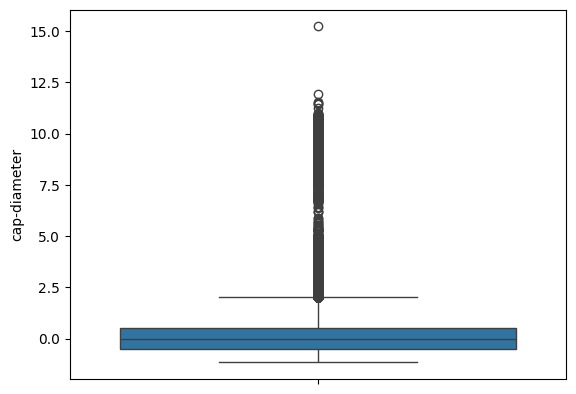

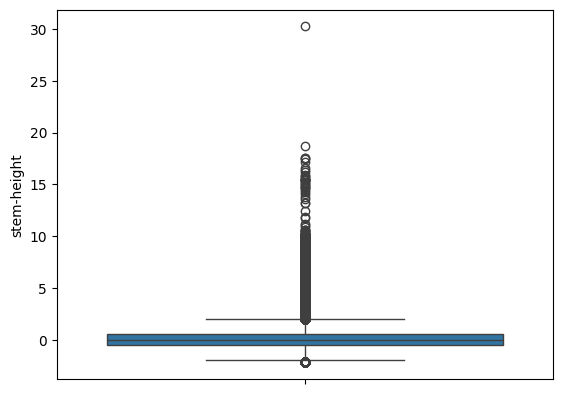

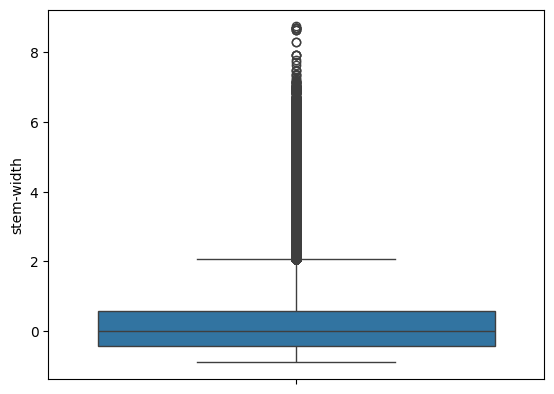

Index(['id', 'class', 'cap-diameter', 'stem-height', 'stem-width',
       'cap-shape_c', 'cap-shape_f', 'cap-shape_o', 'cap-shape_p',
       'cap-shape_s', 'cap-shape_x', 'does-bruise-or-bleed_t',
       'gill-attachment_d', 'gill-attachment_s', 'gill-attachment_x',
       'gill-spacing_d', 'gill-color_k', 'gill-color_n', 'gill-color_w',
       'stem-color_n', 'stem-color_o', 'stem-color_w', 'stem-color_y',
       'has-ring_t', 'ring-type_f', 'ring-type_p', 'ring-type_z', 'habitat_g',
       'habitat_h', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'season_s', 'season_u', 'season_w'],
      dtype='object')

In [15]:
# Scale numerical features (outliers detected -> RobustScaler)
scaler = RobustScaler()

train_encoded[num] = scaler.fit_transform(train_encoded[num])
test_encoded[num] = scaler.transform(test_encoded[num])  # Use same scaler for test

# Visualize the changes after scaling
for col in num:
    plt.figure()
    sns.boxplot(data=train_encoded[col])
    plt.show()

train_encoded.columns


### Split to dataset into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

# Select features (exclude 'class' and 'id')
features = [col for col in train_encoded.columns if col not in ['class', 'id']]
X = train_encoded[features]
y = train_encoded['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Selection and Training

In [17]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# MODELING WITH RANDOMFORESTCLASSIFIER
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Don't surprise if this step takes too long

## Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the RandomForest model
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)


### Let’s try with a comparison model: Logistic Regression

In [19]:
# Logistic Regression for comparison
model_comparison = LogisticRegression(random_state=42)
model_comparison.fit(X_train, y_train)
y_predict_comparison = model_comparison.predict(X_test)

# Evaluate Logistic Regression model
accuracy_comparison = accuracy_score(y_test, y_predict_comparison)
report_comparison = classification_report(y_test, y_predict_comparison)

print(f'\nLogistic Regression Accuracy: {round(accuracy_comparison, 2)}')
print('Logistic Regression Classification Report:\n', report_comparison)

#This is the lowest score I have ever trained :<< . Until now, it’s better to go for the RandomForestClassifier


Logistic Regression Accuracy: 0.69
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           e       0.66      0.63      0.64    282397
           p       0.70      0.73      0.72    340992

    accuracy                           0.69    623389
   macro avg       0.68      0.68      0.68    623389
weighted avg       0.68      0.69      0.68    623389



## Model Deployment

In [20]:
# Predict class labels for the test set
test_pred = rf_model.predict(test_encoded[features])

# Convert predictions to a dataframe for visualization
test_pred_df = pd.DataFrame(test_pred, columns=['Predictions'])

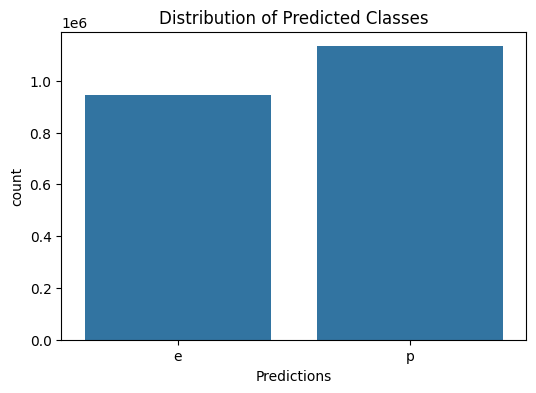

In [21]:
# Plot the count of predicted class labels
plt.figure(figsize=(6, 4))
sns.countplot(data=test_pred_df, x='Predictions')
plt.title('Distribution of Predicted Classes')
plt.show()
